In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

import warnings
warnings.filterwarnings('ignore')

# Understand the data

In [2]:
df_housing = pd.read_csv('C:\\Pinkal_AI_ML_Lectures\\Advanced Regression\\train.csv')
#df_housing = pd.read_csv('C:\\Pinkal_AI_ML_Lectures\\Advanced Regression\\train_modified.csv')
df_housing.shape

(1460, 81)

In [3]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df_housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_housing.describe([0.25, 0.50, 0.75, 0.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
99%,1445.410000,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,...,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Observation
- The dataset consists of 1460 rows and 81 columns 
- The dataset includes both categorical and numerical variables
- The dataset contains missing values which needs to cleaned.

# Cleaning the data

In [6]:
# drop the duplicates, if exist
df_housing = df_housing.drop_duplicates()
df_housing.shape

(1460, 81)

In [7]:
# Drop the id field as it does not affect the prediction
df_housing.drop(['Id'], axis=1, inplace=True)

In [8]:
# check percentage of null values in every column
columns = list(df_housing)
null = []
for i in df_housing.isnull().sum()*100/df_housing.shape[0]:
    null.append(i)
data = {'data_columns': columns, 'null(%)': null}
df_housing_null = pd.DataFrame(data)
df_housing_null[df_housing_null['null(%)'] != 0]

,data_columns,null(%)
2,LotFrontage,17.739726
5,Alley,93.767123
24,MasVnrType,0.547945
25,MasVnrArea,0.547945
29,BsmtQual,2.534247
30,BsmtCond,2.534247
31,BsmtExposure,2.602740
32,BsmtFinType1,2.534247
34,BsmtFinType2,2.602740
41,Electrical,0.068493


## Observation
Columns Alley, MiscFeature, PoolQC, Fence contain huge number of null values. So we have to remove these columns

In [9]:
df_housing_dropped = df_housing.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1)

In [10]:
# Segregate Categorical and Numerical columns
categorical = []
numerical = []

for col in list(df_housing_dropped):
    if df_housing_dropped[col].dtypes == 'object':
        categorical.append(col)  
    else:
        numerical.append(col)
print('Categorical columns:\n',categorical)

print('Numerical columns:\n',numerical)

Categorical columns:
 ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
Numerical columns:
 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'Enclose

In [11]:
# Columns: GarageType, GarageFinish, GarageQual, GarageCond contains NA which means No Garage. So replacing NA with No Garage.
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    df_housing_dropped[col].fillna('No Garage', inplace=True)
df_housing_dropped['GarageYrBlt'].fillna(0, inplace=True)

In [12]:
# Columns: BsmtExposure, BsmtFinType2, BsmtQual, BsmtFinType1, BsmtCond contains NA which means 'No Basement'. So replacing NA with No Basement.
for col in ['BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtFinType1', 'BsmtCond']:
    df_housing_dropped[col].fillna('No Basement', inplace=True)

In [13]:
# Column: FireplaceQu contains NA which means 'No Fireplace'. So replacing NA with No Fireplace.
df_housing_dropped['FireplaceQu'].fillna('No Fireplace', inplace=True)

In [14]:
# Replace missing values with the median
df_housing_dropped.loc[:,'LotFrontage'] = df_housing_dropped.loc[:, 'LotFrontage'].fillna(df_housing_dropped['LotFrontage'].median())

In [15]:
df_housing_dropped.dropna(inplace = True)

In [16]:
# Check null values again
df_housing_dropped.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

So null values have been handled.

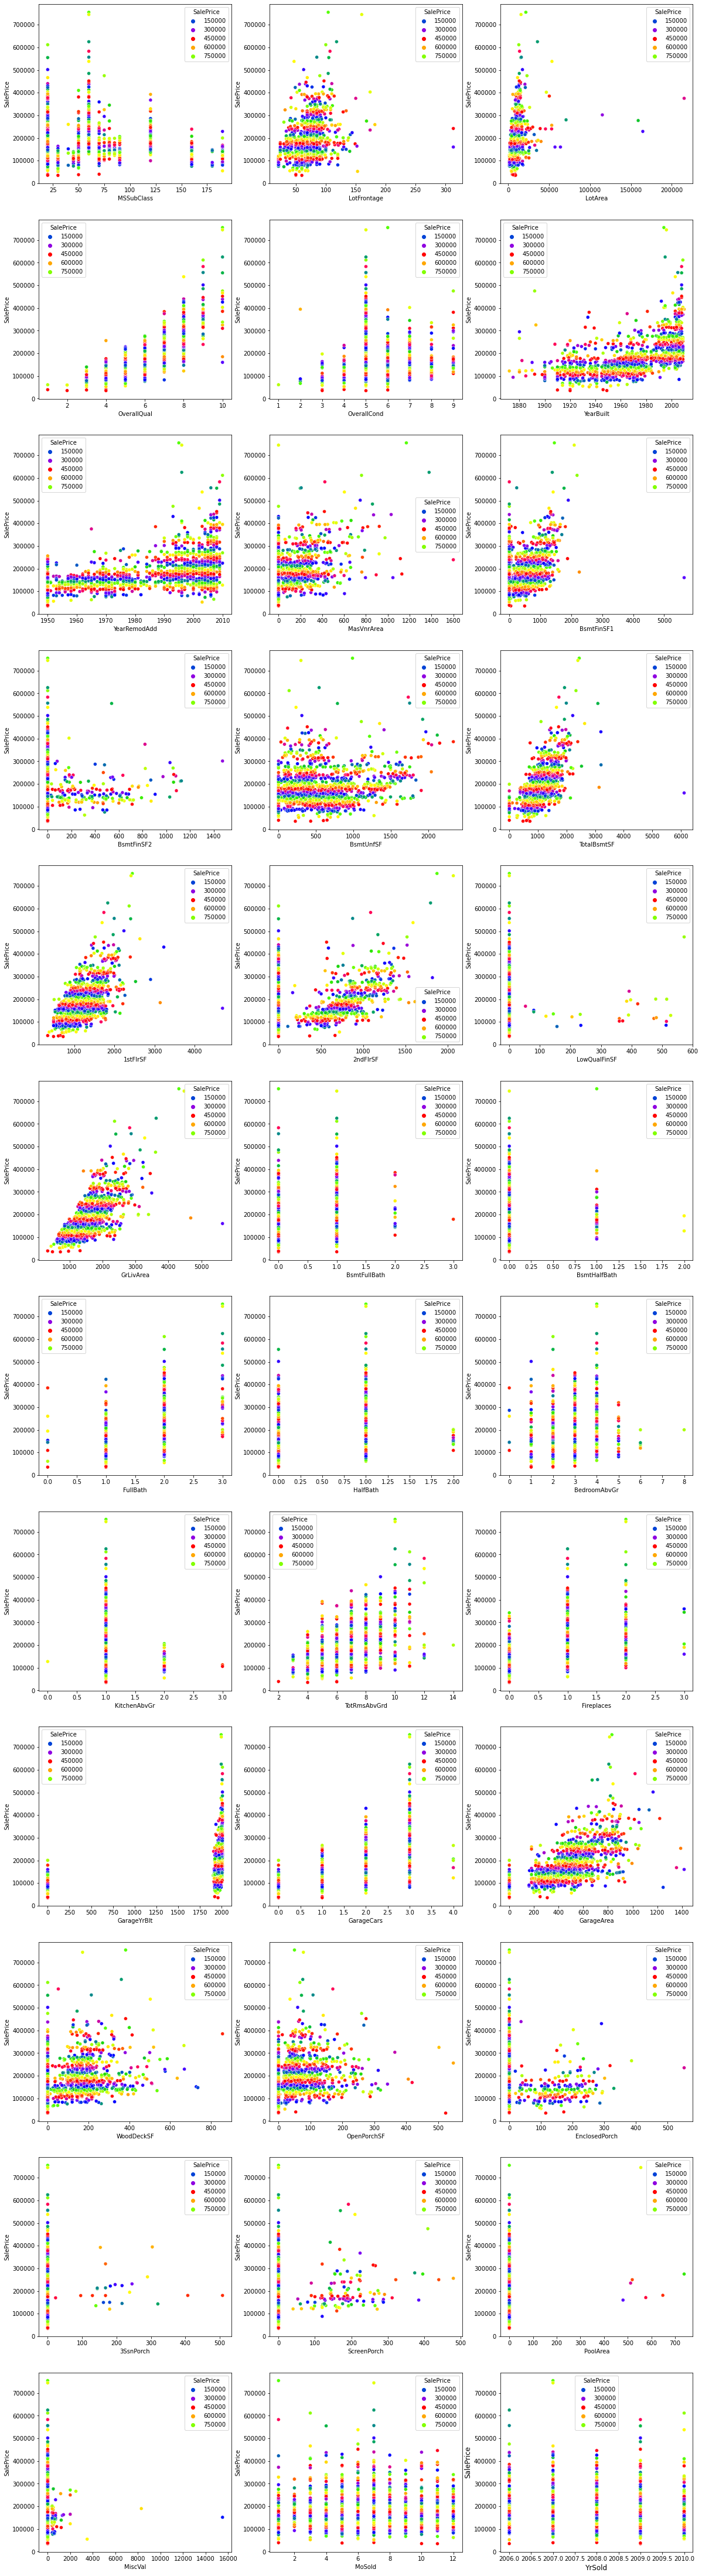

In [17]:
# Visualize the relation of dependent variable SalePrice with several independent variables
fig,axs= plt.subplots(12,3,figsize=(20,80))
for i,ax in zip(numerical,axs.flatten()):
    sns.scatterplot(x=i, y='SalePrice', hue='SalePrice',data=df_housing_dropped,ax=ax,palette='prism')
    plt.xlabel(i,fontsize=12)
    plt.ylabel('SalePrice',fontsize=12)

## Observation
- Variables: GrLivArea, 1stFlrSF, TotalBsmtSF, BsmtFinSF1 have linear relationship with target variable SalePrice
- From YearBuilt variable, it can be observed that newer properties have higher price than older ones.

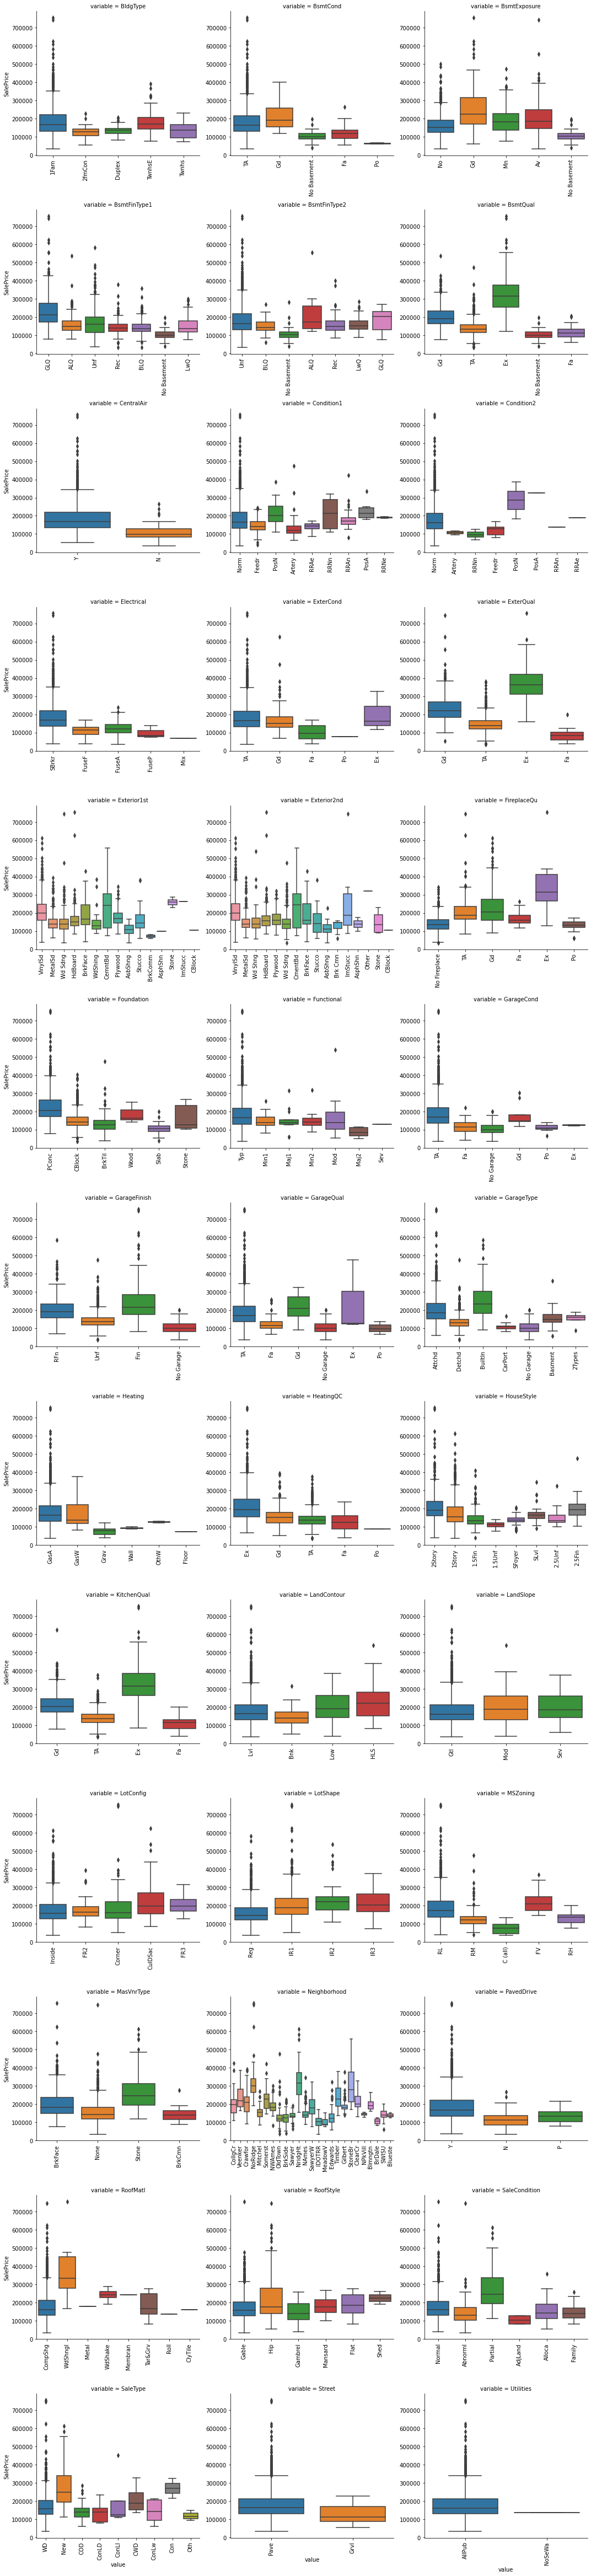

In [18]:
# Plot categorical variables against Target variable SalePrice
def facetgrid_boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)

f = pd.melt(df_housing_dropped, id_vars=['SalePrice'], value_vars=sorted(df_housing_dropped[categorical]))
g = sns.FacetGrid(f, col="variable", col_wrap=3, sharex=False, sharey=False, size=5).map(facetgrid_boxplot, "value", "SalePrice")

## Observation:
- There are some outliers exist for some of the independent variables.
- Basement and Garage properties have significant effect on the SalePrice.

<AxesSubplot:>

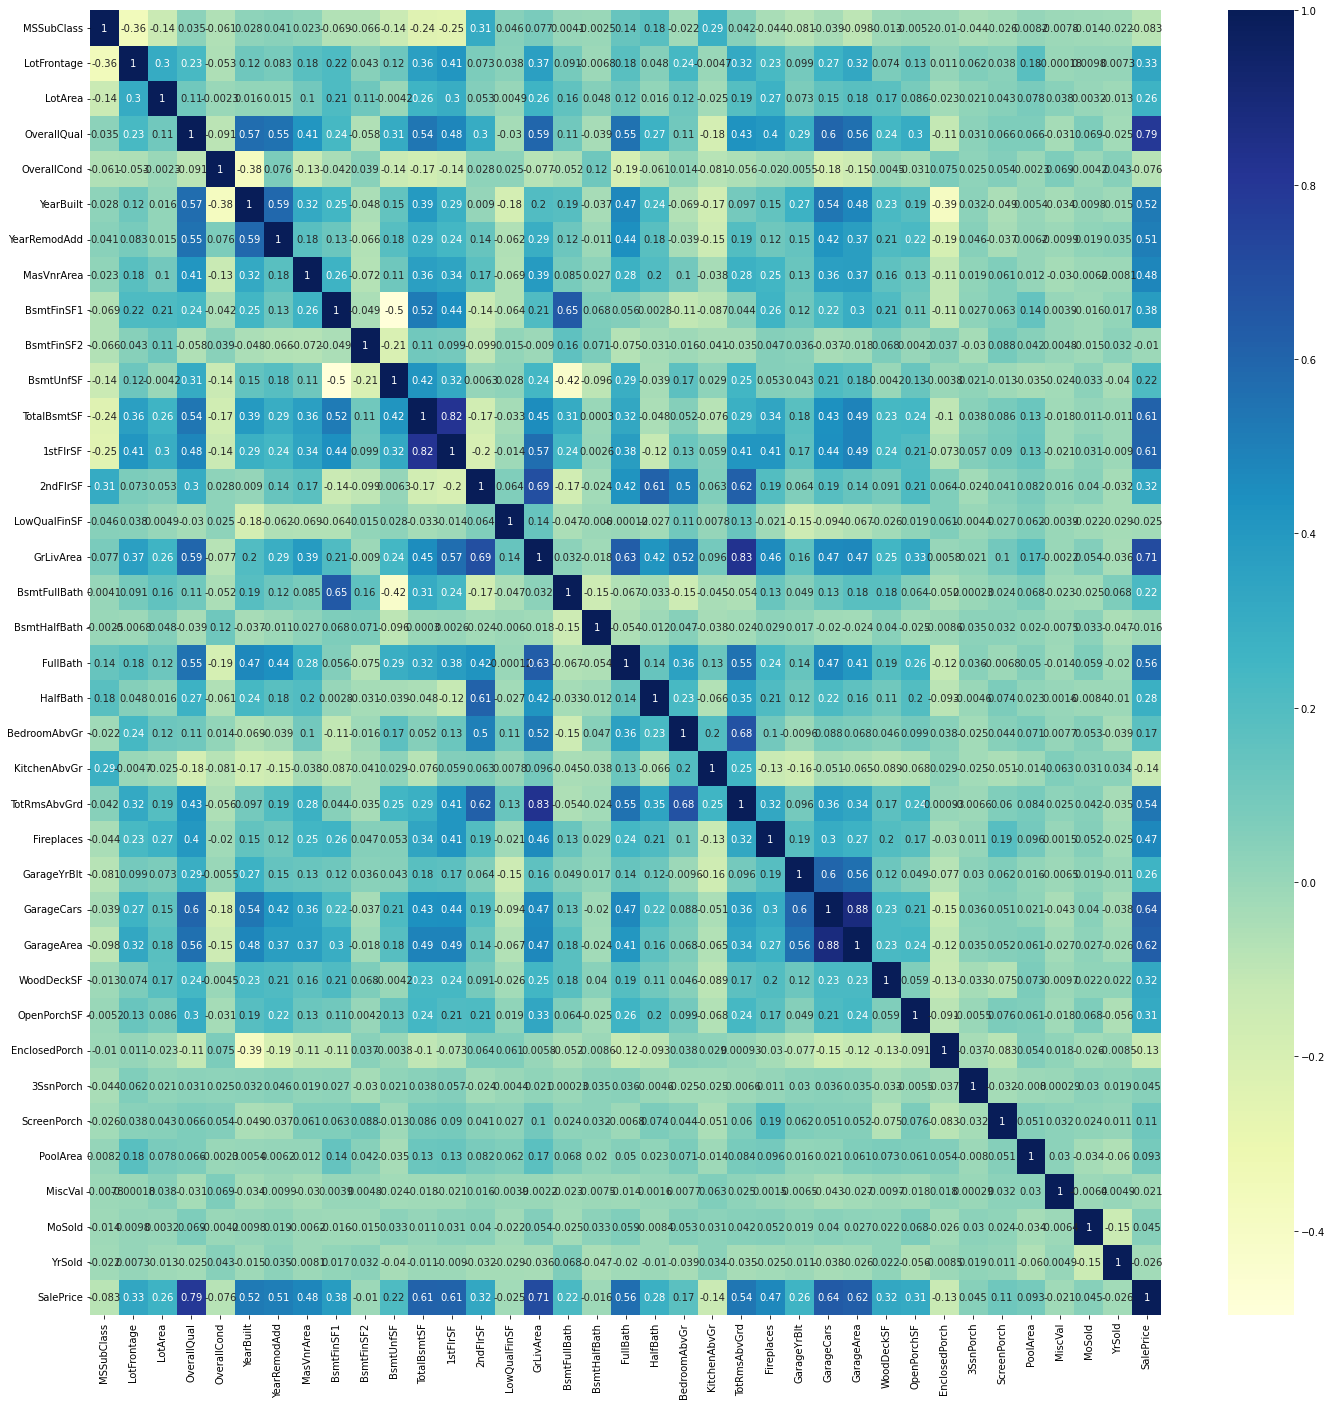

In [19]:
# Check Correlation matrix
plt.figure(figsize=(24, 24))
sns.heatmap(df_housing_dropped.corr(), cmap="YlGnBu", annot=True)

Since the correlation matrix is huge and there are multicolinearity exist between different features, we need to identify those features and drop those from the dataset.

In [20]:
cor_matrix = df_housing_dropped.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.80)]
print(to_drop)

['1stFlrSF', 'TotRmsAbvGrd', 'GarageArea']


In [21]:
# dropping these three columns
df_housing_dropped.drop(df_housing[to_drop], axis=1, inplace = True)
df_housing_dropped.shape

(1451, 73)

# Derive new features

In [22]:
df_housing_dropped['age']=df_housing_dropped['YrSold']-df_housing_dropped['YearBuilt']
df_housing_dropped['garage_age'] = df_housing_dropped['YrSold'] - df_housing_dropped['GarageYrBlt']
df_housing_dropped['remodel_age'] = df_housing_dropped['YrSold'] - df_housing_dropped['YearRemodAdd']

In [23]:
df_housing_dropped.drop('GarageYrBlt',axis=1,inplace=True)

In [24]:
# Convert some numerical feature to categorical features
df_housing_dropped[['MSSubClass']] = df_housing_dropped[['MSSubClass']].astype(str) 
df_housing_dropped['YrSold'] = df_housing_dropped['YrSold'].astype(str)
df_housing_dropped['MoSold'] = df_housing_dropped['MoSold'].astype(str)

In [25]:
# Again segregate Categorical and Numerical columns
categorical = []
numerical = []

for col in list(df_housing_dropped):
    if df_housing_dropped[col].dtypes == 'object':
        categorical.append(col)  
    else:
        numerical.append(col)
print('Categorical columns:\n',categorical)

print('Numerical columns:\n',numerical)

Categorical columns:
 ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']
Numerical columns:
 ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 

In [26]:
# Create dummy features from Categorical variables
df_dummy = pd.get_dummies(df_housing_dropped[categorical], drop_first=True)

In [27]:
#Concating the dataset with dummies with the the original dataset
df_concat = pd.concat([df_housing_dropped, df_dummy], axis=1)
df_concat.shape

(1451, 314)

In [28]:
# dropping the original columns from where dummies are created
df_housing_final = df_concat.drop(categorical, axis = 1)
df_housing_final.shape

(1451, 272)

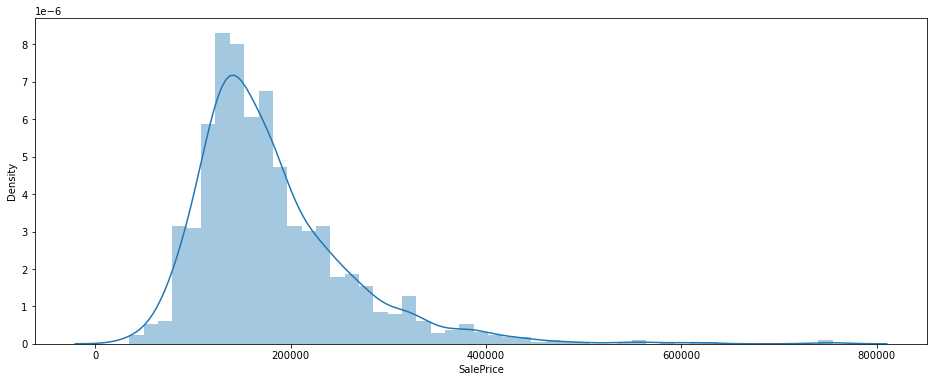

In [29]:
# Check the distribution of the target variable SalePrice
plt.figure(figsize=(16,6))
sns.distplot(df_housing_final.SalePrice)
plt.show()

So the distribution is left skewed.

# Creating train-test from final dataframe

In [30]:
X = df_housing_final.drop('SalePrice', axis=1)
y = df_housing_final['SalePrice']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Scaling the dataset

In [32]:
scaler = MinMaxScaler()
numerical_1 = numerical.copy()
numerical_1.remove('SalePrice')
X_train[numerical_1] = scaler.fit_transform(X_train[numerical_1])
X_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
801,0.065068,0.016359,0.250,0.714286,0.318841,0.666667,0.000000,0.034904,0.000000,0.427654,...,0,0,0,0,1,0,0,0,1,0
569,0.164384,0.026792,0.375,0.428571,0.775362,0.483333,0.000000,0.167080,0.000000,0.000000,...,0,0,0,0,1,0,0,0,1,0
1181,0.147260,0.020038,0.750,0.428571,0.985507,0.966667,0.116250,0.262225,0.000000,0.051370,...,0,0,1,0,0,0,0,0,0,1
808,0.219178,0.056557,0.375,0.428571,0.681159,0.266667,0.654375,0.091425,0.114286,0.162671,...,0,0,0,0,1,0,0,0,1,0
1095,0.195205,0.037472,0.500,0.428571,0.971014,0.933333,0.000000,0.004252,0.000000,0.552226,...,0,0,0,0,1,0,0,0,1,0


In [33]:
X_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,...,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000
mean,0.167694,0.043382,0.516502,0.512597,0.724166,0.585731,0.064786,0.076438,0.043528,0.250238,...,0.002956,0.002956,0.081773,0.001970,0.867980,0.003941,0.008867,0.008867,0.826601,0.083744
std,0.079066,0.052612,0.171750,0.156045,0.216586,0.339937,0.115137,0.082622,0.146236,0.189578,...,0.054312,0.054312,0.274154,0.044368,0.338679,0.062684,0.093793,0.093793,0.378778,0.277140
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.133562,0.028979,0.375000,0.428571,0.594203,0.300000,0.000000,0.000000,0.000000,0.105522,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.164384,0.037776,0.500000,0.428571,0.739130,0.716667,0.000000,0.061836,0.000000,0.216610,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.198630,0.047737,0.625000,0.571429,0.927536,0.900000,0.105625,0.123937,0.000000,0.356164,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
X_test[numerical_1] = scaler.transform(X_test[numerical_1])
X_test.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,...,436.000000,436.000000,436.000000,436.000000,436.000000,436.0,436.000000,436.000000,436.000000,436.000000
mean,0.166316,0.042238,0.500573,0.508519,0.703846,0.564450,0.064991,0.082840,0.037842,0.225507,...,0.004587,0.004587,0.082569,0.002294,0.871560,0.0,0.004587,0.025229,0.811927,0.084862
std,0.066516,0.028615,0.174526,0.166013,0.223377,0.353839,0.108660,0.075877,0.140268,0.187736,...,0.067651,0.067651,0.275546,0.047891,0.334964,0.0,0.067651,0.157001,0.391220,0.278997
min,0.000000,0.001776,-0.125000,-0.142857,0.072464,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.133562,0.030333,0.375000,0.428571,0.565217,0.233333,0.000000,0.000000,0.000000,0.082085,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000
50%,0.164384,0.038678,0.500000,0.428571,0.710145,0.725000,0.000000,0.080971,0.000000,0.182363,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000
75%,0.196062,0.048383,0.625000,0.571429,0.927536,0.900000,0.098750,0.130670,0.000000,0.324272,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000
max,0.551370,0.324668,1.000000,1.000000,0.992754,1.000000,0.731250,0.337349,1.316071,0.907962,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


# Model building and Evaluation

## Ridge Regression

In [35]:
# list of alphas to tune the model
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [36]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006929,0.001580,0.001862,0.000428,0.0001,{'alpha': 0.0001},-25697.022198,-16574.890223,-22532.834863,-22392.937907,...,-21712.179693,2950.572728,24,-11221.873531,-12605.075207,-12048.121952,-12206.732145,-11086.203326,-11833.601232,585.360115
1,0.006136,0.000543,0.002356,0.000427,0.001,{'alpha': 0.001},-25687.128812,-16554.366770,-22474.891174,-22270.088282,...,-21656.889163,2947.966393,23,-11218.814814,-12601.247410,-12036.677620,-12210.481375,-11085.580375,-11830.560319,584.809477
2,0.006211,0.000458,0.001866,0.000216,0.01,{'alpha': 0.01},-25575.853322,-16720.406495,-22008.354171,-21399.102680,...,-21346.602582,2822.396386,22,-11220.270859,-12688.295131,-12048.403940,-12301.717725,-11220.088387,-11895.755209,588.052972
3,0.006128,0.000759,0.002401,0.000488,0.05,{'alpha': 0.05},-25109.065924,-18057.010337,-21158.633921,-20805.348620,...,-21263.665692,2249.289323,19,-11266.376324,-13433.285865,-12722.160785,-12998.976912,-12083.024643,-12500.764906,756.974078
4,0.006069,0.000054,0.001995,0.000015,0.1,{'alpha': 0.1},-24712.425516,-18733.558285,-20844.972176,-20752.882143,...,-21299.684032,1937.088246,20,-11327.726393,-14025.050492,-13363.088360,-13599.627035,-12737.156709,-13010.529798,938.844553


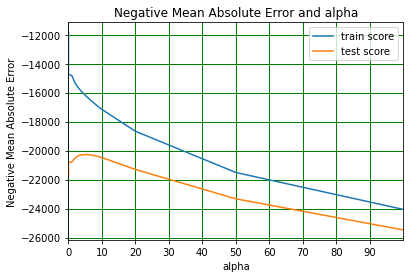

In [37]:
# plot mean train score and mean test score vs alpha
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.xlim(0, 100)
plt.xticks(np.arange(0, 100, 10))
plt.grid(color='g', linestyle='-', linewidth=1)
plt.show()

In [38]:
alpha = 20
#alpha = 40
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=20)

In [39]:
# check model parameters for Ridge
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(106375.819, 'constant'),
 (43755.538, 'OverallQual'),
 (35309.058, 'GrLivArea'),
 (32226.266, 'GarageCars'),
 (30461.055, 'Neighborhood_NoRidge'),
 (30235.361, '2ndFlrSF'),
 (27402.811, 'FullBath'),
 (23295.77, 'Neighborhood_NridgHt'),
 (-22919.866, 'BsmtQual_Gd'),
 (-21835.883, 'KitchenQual_TA'),
 (-20209.112, 'BsmtQual_TA'),
 (18734.089, 'Neighborhood_StoneBr'),
 (-18565.627, 'KitchenQual_Gd'),
 (-17311.219, 'ExterQual_TA'),
 (17132.176, 'Fireplaces'),
 (17118.805, 'MasVnrArea'),
 (17028.545, 'BsmtExposure_Gd'),
 (15951.769, 'TotalBsmtSF'),
 (15924.764, 'BsmtFullBath'),
 (-14690.065, 'Neighborhood_Gilbert'),
 (-14289.646, 'Neighborhood_Edwards'),
 (14229.297, 'Exterior1st_BrkFace'),
 (14137.754, 'HalfBath'),
 (14062.252, 'BsmtUnfSF'),
 (13943.272, 'WoodDeckSF'),
 (13096.305, 'OverallCond'),
 (12775.717, 'Neighborhood_Crawfor'),
 (12276.237, 'BedroomAbvGr'),
 (-12103.519, 'BldgType_TwnhsE'),
 (11814.706, 'RoofMatl_WdShngl'),
 (-11163.471, 'BldgType_Twnhs'),
 (10952.532, 'BsmtFinSF1'

In [40]:
# predict using the Ridge model
y_train_pred = ridge.predict(X_train)
print("Ridge::R2 score on training set: ", r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred_ridge = ridge.predict(X_test)
print("Ridge::R2 score on test set: ", r2_score(y_true=y_test, y_pred=y_test_pred_ridge))

Ridge::R2 score on training set:  0.8600694380834354
Ridge::R2 score on test set:  0.8388173470547214


In [41]:
print('The MSE of the model on the train dataset', mean_squared_error(y_train, y_train_pred))
print('The MSE of the model on the test dataset', mean_squared_error(y_test, y_test_pred_ridge))

The MSE of the model on the train dataset 876531132.2750056
The MSE of the model on the test dataset 1020608391.0301318


Ridge::Error distribution in test dataset


Text(0.5, 1.0, 'Error disribution, ridge regression')

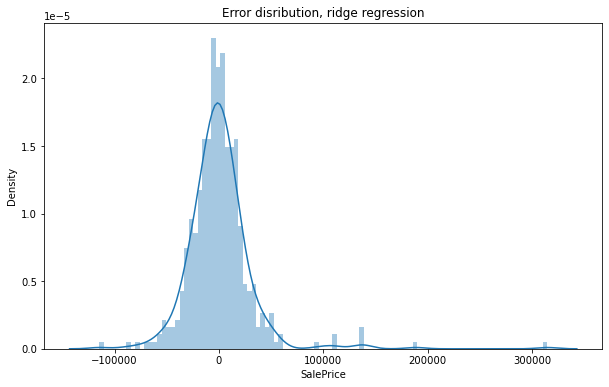

In [42]:
print('Ridge::Error distribution in test dataset')
plt.figure(figsize=(10,6))
sns.distplot((y_test - y_test_pred_ridge), bins = 100)
plt.title('Error disribution, ridge regression')

Now the error terms are normally distributed.

## Lasso Regression

In [43]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [44]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.079874,0.003864,0.002556,0.000591,0.0001,{'alpha': 0.0001},-25693.335881,-14293.450673,-22760.315988,-22563.810619,...,-21355.470527,3798.294114,27,-11227.868175,-12672.676343,-12055.628323,-12241.093452,-11089.367552,-11857.326769,606.197126
1,0.077761,0.006658,0.002262,0.000534,0.001,{'alpha': 0.001},-25692.690484,-14293.357739,-22756.835521,-22563.321574,...,-21354.269766,3797.885278,26,-11227.858682,-12672.642586,-12055.585650,-12241.059187,-11089.372583,-11857.303738,606.181612
2,0.078325,0.006287,0.002746,0.000382,0.01,{'alpha': 0.01},-25686.236634,-14292.521650,-22727.730280,-22558.418955,...,-21343.418416,3794.195330,25,-11227.941808,-12672.353855,-12055.234232,-12240.881709,-11089.572307,-11857.196782,605.990621
3,0.085116,0.007446,0.002438,0.000480,0.05,{'alpha': 0.05},-25673.290819,-14288.804820,-22636.122137,-22523.570151,...,-21306.724029,3783.573895,24,-11228.913220,-12671.603936,-12053.861117,-12240.703187,-11090.586903,-11857.133673,605.217970
4,0.085824,0.006411,0.002217,0.000389,0.1,{'alpha': 0.1},-25660.260630,-14284.978455,-22527.684476,-22472.986818,...,-21263.462243,3771.045752,23,-11230.628760,-12671.356282,-12052.752234,-12240.874228,-11091.682253,-11857.458751,604.467641


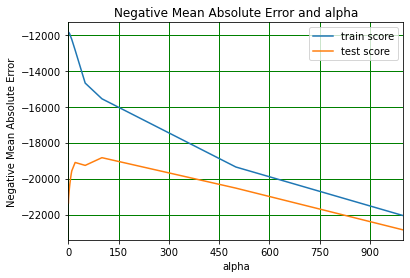

In [45]:
# plotting mean test score and mean train score vs alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.xlim(0, 1000)
plt.xticks(np.arange(0, 1000, 150))
plt.grid(color='g', linestyle='-', linewidth=1)
plt.show()

In [46]:
alpha = 150
#alpha = 300
lasso = Lasso(alpha=alpha)      
lasso.fit(X_train, y_train)

Lasso(alpha=150)

In [47]:
# check model parameters for Lasso
# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
var_coeff_lasso = list(zip(model_parameters,cols))
sorted(var_coeff_lasso, key=lambda x:abs(x[0]), reverse=True)

[(208666.256, 'GrLivArea'),
 (-125722.145, 'Condition2_PosN'),
 (95688.044, 'OverallQual'),
 (44972.992, 'GarageCars'),
 (41863.806, 'Neighborhood_NoRidge'),
 (34517.1, 'Neighborhood_NridgHt'),
 (30261.245, 'constant'),
 (28643.581, 'Neighborhood_StoneBr'),
 (23796.775, 'OverallCond'),
 (21689.021, 'BsmtFullBath'),
 (-20967.295, 'BsmtQual_Gd'),
 (20854.521, 'BsmtExposure_Gd'),
 (-20301.34, 'KitchenQual_TA'),
 (-18464.665, 'KitchenQual_Gd'),
 (-17734.345, 'BsmtQual_TA'),
 (16705.753, 'Exterior1st_BrkFace'),
 (16570.026, '2ndFlrSF'),
 (16201.961, 'Neighborhood_Crawfor'),
 (16131.124, 'FullBath'),
 (15906.895, 'RoofMatl_WdShngl'),
 (13657.223, 'Fireplaces'),
 (12998.204, 'SaleType_New'),
 (12875.408, 'Neighborhood_Somerst'),
 (12444.556, 'WoodDeckSF'),
 (11936.387, 'MasVnrArea'),
 (-11211.323, 'BsmtExposure_No Basement'),
 (10627.326, 'MSSubClass_20'),
 (10579.19, 'LotConfig_CulDSac'),
 (10335.843, 'LandContour_HLS'),
 (-9852.147, 'BldgType_Twnhs'),
 (-9628.978, 'KitchenQual_Fa'),
 (-9165

In [48]:
# predict using the Lasso model
y_train_pred = lasso.predict(X_train)
print("Lasso::R2 score on training set: ", r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred_lasso = lasso.predict(X_test)
print("Lasso::R2 score on test set: ", r2_score(y_true=y_test, y_pred=y_test_pred_lasso))

Lasso::R2 score on training set:  0.8846434917583026
Lasso::R2 score on test set:  0.8699388498205985


In [49]:
print('The MSE of the model on the train dataset', mean_squared_error(y_train, y_train_pred))
print('The MSE of the model on the test dataset', mean_squared_error(y_test, y_test_pred_lasso))

The MSE of the model on the train dataset 722598190.1271597
The MSE of the model on the test dataset 823547067.8423003


Lasso::Error distribution in test dataset


Text(0.5, 1.0, 'Error distribution, lasso regression')

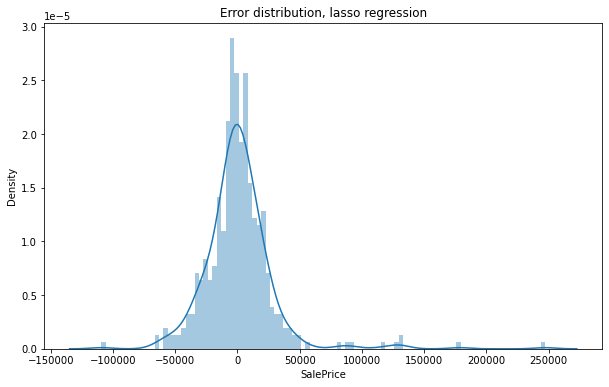

In [50]:
print('Lasso::Error distribution in test dataset')
plt.figure(figsize=(10,6))
sns.distplot((y_test - y_test_pred_lasso), bins = 100)
plt.title('Error distribution, lasso regression')

Now the error terms are normally distributed.

## Observation
- Lambda value for Ridge = 20 and lambda for Lasso = 150
- Lasso Regression gives a simpler model with only 106 features to predict the house price.
- Training set: R2 score for Ridge Regression = 0.8600694380834354 and R2 Score for Lasso Regression = 0.8846434917583026
- Test Set: R2 score for Ridge Regression = 0.8388173470547214 and R2 score for Lasso Regression = 0.8699388498205985

In [51]:
#variables with positive Lasso coefficients
pos_var = [x for x in var_coeff_lasso if x[0] > 0.0]
final_var_pos = []
for i in list(df_housing_final):
    for j in pos_var:
        if i in j[-1]:
            final_var_pos.append(i)
            break
print(final_var_pos)
print(len(final_var_pos))

['LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'age', 'MSSubClass_20', 'MSSubClass_50', 'MSZoning_FV', 'MSZoning_RL', 'LotShape_IR2', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'LotConfig_CulDSac', 'Neighborhood_BrkSide', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Condition1_Norm', 'HouseStyle_1Story', 'RoofStyle_Hip', 'RoofMatl_CompShg', 'RoofMatl_WdShngl', 'Exterior1st_BrkFace', 'Exterior2nd_CmentBd', 'Exterior2nd_ImStucc', 'Exterior2nd_VinylSd', 'MasVnrType_Stone', 'Foundation_PConc', 'BsmtCond_TA', 'BsmtExposure_Gd', 'BsmtFinType1_BLQ', 'BsmtFinType1_GLQ', 'BsmtFinType2_Unf', 'CentralAir_Y', 'Functional_Typ', 'FireplaceQu_TA', 'GarageType_BuiltIn', 'PavedDrive_Y', 'MoSold_3', 'MoSold_5', 'MoSold_7', 'SaleType_New', 'SaleCondition_Normal']
56


In [52]:
#variables with negative Lasso coefficients
neg_var = [x for x in var_coeff_lasso if x[0] < 0.0]
final_var_neg = []
for i in list(df_housing_final):
    for j in neg_var:
        if i in j[-1]:
            final_var_neg.append(i)
            break
print(final_var_neg)
print(len(final_var_neg))

['age', 'remodel_age', 'MSSubClass_160', 'MSSubClass_190', 'MSSubClass_90', 'MSZoning_RM', 'LotShape_IR3', 'LotShape_Reg', 'LotConfig_FR2', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_OldTown', 'Condition1_Feedr', 'Condition2_PosN', 'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_2Story', 'RoofStyle_Gable', 'Exterior1st_HdBoard', 'Exterior1st_Stucco', 'Exterior2nd_Stucco', 'Exterior2nd_Wd Shng', 'MasVnrType_BrkFace', 'ExterQual_TA', 'ExterCond_TA', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_No Basement', 'BsmtQual_TA', 'BsmtCond_No Basement', 'BsmtExposure_Mn', 'BsmtExposure_No', 'BsmtExposure_No Basement', 'BsmtFinType1_LwQ', 'BsmtFinType1_Unf', 'HeatingQC_Fa', 'HeatingQC_Gd', 'HeatingQC_TA', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'GarageType_Detchd', 'GarageFinish_RFn', 'GarageFinish_Unf', 'GarageQual_Fa', 'GarageQual_TA', 'MoSold_10', 'YrSold_2009']
51


# Conclusion

- Optimum value of Lambda for Ridge Regression = 20
- Optimum value of Lambda for Lasso Regression = 150